In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
pd.read_csv("../../results/improved-tamaraw/conn~single/defence~tamaraw/classifier~kfp/feature-importances.csv", index_col="feature", squeeze=True).sort_values(ascending=False).head(20)

feature
size-stats::in::std               0.026823
size-stats::in::var               0.026412
size-stats::overall::var          0.022596
size-stats::overall::std          0.021789
concentration-stats::std::out     0.020606
size-stats::in::mean              0.020413
total-size::in                    0.019090
total-size::overall               0.015985
alt-pps::0                        0.015223
time::in::percentile-25           0.012447
size-stats::overall::mean         0.012421
alt-conc::0                       0.011661
first-30::packet-counts::out      0.011515
alt-pps::1                        0.011513
conc::1                           0.011459
fraction-incoming                 0.011425
interarrival::out::std            0.011396
first-30::packet-counts::in       0.011207
concentration-stats::mean::out    0.011108
fraction-outgoing                 0.011011
Name: weight, dtype: float64

In [ ]:
def scatterplot(filename):
    with h5py.File(filename) as h5in:
    # with h5py.File("../../results-on-drive/ml-eval-conn/defence~tamaraw/dataset.h5") as h5in:
        frame = pd.DataFrame({
            "label": h5in["labels"]["class"][:],
            "sizes": h5in["sizes"][:]
        })

    frame

    def total_in(sizes):
        return np.abs(sizes[sizes < 0]).sum()

    def in_std(sizes):
        return np.std(np.abs(sizes[sizes < 0]))
    
    def max_in(sizes):
        return np.min(sizes)

    frame["total-size::in"] = frame["sizes"].apply(total_in)
    frame["size:::"] = frame["sizes"].apply(total_in)
    frame["size-stats::in::std"] = frame["sizes"].apply(in_std)
    frame["min"] = frame["sizes"].apply(max_in)
    display(frame)

    plot_data = frame[(frame["label"] >= 0) & (frame["label"] < 15)].copy()
    plot_data["label"] = plot_data["label"].astype(str)

    fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=150)
    sns.scatterplot(x="total-size::in", y="size-stats::in::std", data=plot_data, hue="label", style="label")
    return frame

frame = scatterplot("../../results/improved-tamaraw/defence~simulated-tamaraw/dataset.h5")

In [ ]:
def plot_hist(excess, seed=0):

    with h5py.File("../../results/improved-tamaraw/defence~simulated-tamaraw/dataset.h5") as h5in:
        frame = pd.DataFrame({
            "labels": np.asarray(h5in["labels"]["class"]),
            "sizes": np.asarray(h5in["sizes"])
        })
    plot_frame = frame.groupby("labels").sample(n=6, random_state=seed)
    plot_frame = plot_frame.query("labels >= 0 and labels < 10")

    fig, axes_grid = plt.subplots(10, 6, figsize=(12, 21), dpi=150, sharex=True, sharey=True)
    fig.suptitle(f"Excess_msd = {excess}")
    for row, (label, data) in enumerate(plot_frame.groupby("labels")):
        axes_row = axes_grid[row, :]
        axes_row[0].set_ylabel(f"Class = {label}")
        for size_data, ax in zip(data["sizes"], axes_row):
            ax.set_xticks(list(range(0, -1600, -250)))
            sns.histplot(size_data, binrange=(-1500, 0), bins=30, ax=ax)

plot_hist(500, seed=1)
# for i, ax in zip([0, 100, 200, 300, 401, 500, 600, 700, 800, 900], axes):
#     sns.histplot(sizes[i], binrange=(-1500, 0), ax=ax,stat="density")
#     ax.set_title(i)

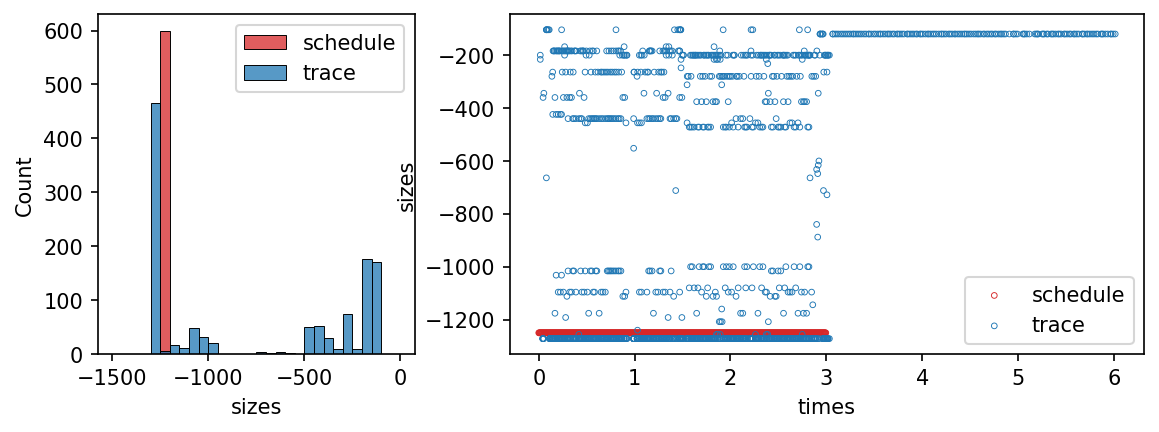

In [143]:
def plot_alt_hist(filename):
    schedule = pd.read_csv(filename + "/schedule.csv", header=None, names=["times", "sizes"]).query("sizes < 0")
    trace = pd.read_csv(filename + "/trace.csv", header=None, names=["times", "sizes"]).query("sizes < 0")
#     trace = pd.read_csv("../../../neqo-qcd/trace.csv", header=None, names=["times", "sizes"]).sort_values(by="times").reset_index(drop=True)
#     trace["sizes"] *= -1
#     trace["times"] -= trace.loc[0, "times"]
#     schedule = pd.read_csv("/tmp/schedule.csv", header=None, names=["times", "sizes"]).query("sizes < 0")

    fig, axes = plt.subplots(1, 2, figsize=(9, 3), dpi=150,gridspec_kw={'width_ratios': [1, 2]})
    sns.histplot(schedule['sizes'], binrange=(-1500, 0), bins=30, ax=axes[0], label="schedule", color='tab:red')
    sns.histplot(trace['sizes'], binrange=(-1500, 0), bins=30, ax=axes[0], label="trace", color='tab:blue')
    axes[0].legend()
    
    sns.scatterplot(data=schedule, y="sizes", x="times", ax=axes[1], label="schedule", color='tab:red', marker='.', s=30, facecolor="none", edgecolor="tab:red")
    sns.scatterplot(data=trace, y="sizes", x="times", ax=axes[1], label="trace", color='tab:blue', marker='.', s=30, facecolor="none", edgecolor="tab:blue")
    axes[1].legend()
    
    
plot_alt_hist("../../results/tamaraw-debug/max_udp_payload_size/10x50+0/dataset/0007/0_0/")

<AxesSubplot:ylabel='Density'>

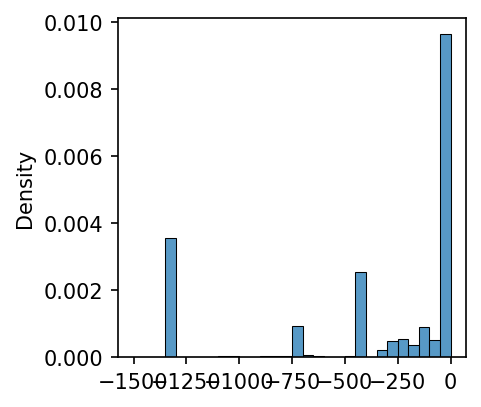

In [17]:
sizes = pd.read_csv("../../../neqo-qcd/inc-trace-3.csv", header=None, squeeze=True).to_numpy() * -1

fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=150, sharex=True, sharey=True)
ax.set_xticks(list(range(0, -1600, -250)))
sns.histplot(sizes, binrange=(-1500, 0), bins=30, ax=ax, stat="density")


NameError: name 'axes_grid' is not defined

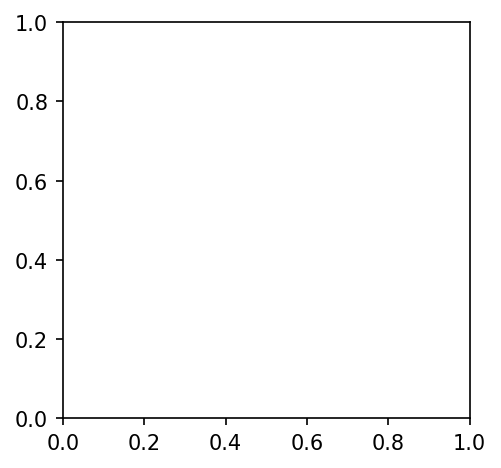

In [9]:
def plot_hist2(excess, seed=0):
    with h5py.File(f"../../results/tamaraw-debug-10x50/msd-excess~{excess}/dataset.h5") as h5in:
        frame = pd.DataFrame({
            "labels": np.asarray(h5in["labels"]["class"]),
            "sizes": np.asarray(h5in["sizes"])
        })
    plot_frame = frame.groupby("labels").sample(n=4, random_state=seed)

    fig, axes = plt.subplots(1, 1, figsize=(3.5, 3.5), dpi=150, sharex=True, sharey=True)
    for row, (label, data) in enumerate(plot_frame.groupby("labels")):
        axes_row = axes_grid[row, :]
        axes_row[0].set_ylabel(f"Class = {label}")
        for size_data, ax in zip(data["sizes"], axes_row):
            ax.set_xticks(list(range(0, -1600, -250)))
            sns.histplot(size_data, binrange=(-1500, 0), bins=30, ax=ax, stat="density")

plot_hist2(1500, seed=1)
# for i, ax in zip([0, 100, 200, 300, 401, 500, 600, 700, 800, 900], axes):
#     sns.histplot(sizes[i], binrange=(-1500, 0), ax=ax,stat="density")
#     ax.set_title(i)

In [ ]:
plot_hist(100, seed=3)

In [ ]:
plot_hist(1500, seed=2)